In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from src import nbody as nb
import rebound
from scipy import interp
from astropy import constants as const
import datetime
import reboundx
from reboundx import constants
years = 2.*np.pi
fs = 14 #fontsize

blue = '#1f77b4'
orange = '#ff7f0e'

years = 2.*np.pi
G = const.G.value
c = const.c.value
M_jup = const.M_jup.value
M_sun = const.M_sun.value
au = const.au.value
R_jup = const.R_jup.value
Q = 1.0e5 #tidal quality factor
k = 0.26 #tidal Love number

In [ ]:
file = 'all_planets.csv'
df = pd.read_csv(file,comment="#")
a = 'pl_orbsmax'
e = 'pl_orbeccen'
method = 'pl_discmethod'
mass = 'pl_bmassj'
host = 'pl_hostname'

c0 = (df[method]=='Radial Velocity')&(df[mass]>=0.25) #jupiters
c1 = (df[method]=='Radial Velocity')&(df[mass]>=0.25)&(df[a]<0.1) #hot jupiters
c2 = (df[method]=='Radial Velocity')&(df[mass]>=0.25)&(df[a]>=0.1)&(df[a]<=1.0) #warm jupiters
c3 = (df[method]=='Radial Velocity')&(df[mass]>=0.25)&(df[a]>1.0) #cold jupiters


s2 = set(df[c2]['pl_hostname'])
s3 = set(df[c3]['pl_hostname'])
Int = s2.intersection(s3)
df2 = df[df['pl_hostname'].isin(Int)]


df3 = pd.concat([df2[c2],df2[c3]],ignore_index=False).sort_index()

bins = [0.0,0.2,0.4,0.6,0.8,1.0]
counts1, bins1, bars1 = plt.hist(df[c2][e],bins=bins,ls='--',label='Warm Jupiter (WJ)',color='gray',histtype='step',lw=3)
counts2, bins2, bars2 = plt.hist(df2[c2][e],bins=bins,label='WJ with known outer\n Jovian companion',
                                 color='black',histtype='step',lw=3)
plt.ylabel('N')
plt.xlabel('Eccentricity')
plt.legend()
plt.tight_layout()
plt.rcParams.update({'font.size': 12})
#plt.savefig('EccenHisto.pdf',bbox_inches='tight')

alpha = 0.4
fig, ax1 = plt.subplots()
ax1.plot(df[c1][a],df[c1][e],'.',color='gray',label='Hot Jupiters',alpha=alpha)
ax1.plot(df[~df[host].isin(df2[host])][c2][a],df[~df[host].isin(df2[host])][c2][e]
         ,'.',color='gray',alpha=alpha,label='Warm Jupiters')
ax1.plot(df[~df[host].isin(df2[host])][c3][a],df[~df[host].isin(df2[host])][c3][e]
         ,'.',color='gray',alpha=alpha,label='Cold Jupiters')
ax1.fill_between([0.1,1.0],[max(df[c2][e]),max(df[c2][e])],[0.4,0.4], color='gray',alpha=0.2,zorder=0)
ax1.plot(df2[c2][a],df2[c2][e],'o',color='k')
ax1.plot(df2[c3][a],df2[c3][e],'+',ms=10,color='k')
ax1.set_ylabel('Eccentricity')
ax1.set_xlabel('Semi-major axis (AU)')
ax1.set_xscale('log')
plt.margins(x=0,y=0)
#plt.savefig('EccentricitySemimajor.pdf',bbox_inches='tight')




In [ ]:
filename = 'N-body.20191005T194745'
data = np.loadtxt('other/data/'+filename+'.txt')
times = data[:,0]
a1,e1 = data[:,1], data[:,2]
inc1,inc2 = data[:,3], data[:,4]
Omega1,Omega2 = data[:,5], data[:,6]
pomega1,pomega2 = data[:,7], data[:,8]
imut = np.degrees(nb.calc_imut(inc1, inc2, Omega1, Omega2))
deltapomega = np.degrees(nb.calc_deltapomega(pomega1, pomega2))


fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True) 
plt.subplots_adjust(wspace=0, hspace=0.05)
ax = plt.gca()
ax.autoscale(enable=True, axis='x', tight=True)


ax1.plot(times/1e6,imut,color='black')
ax1.set_ylabel(r'$i_{\mathrm{mut}}$ (deg)')

ax2.plot(times/1e6,e1,color='black')
ax2.set_ylabel(r'$e$')

ax3.plot(times/1e6,deltapomega,color='black')
ax3.set_ylabel(r'$\Delta\varpi$ (deg)')
ax3.set_xlabel('Time (Myr)')
ax3.legend(loc="lower left")

plt.tight_layout()
#plt.savefig('plots/'+filename+'.pdf',bbox_inches='tight')



In [ ]:
years = 2.0*np.pi

datetag = '20191108T145128' #'20191108T144110' #'20191031T075855'
file = 'simulation_archive/sa'+datetag+'.bin'
sa = rebound.SimulationArchive(file)
e1 = np.zeros(len(sa))
a1 = np.zeros(len(sa))
inc1 = np.zeros(len(sa))
inc2 = np.zeros(len(sa))
Omega1 = np.zeros(len(sa))
Omega2 = np.zeros(len(sa))
pomega1 = np.zeros(len(sa))
pomega2 = np.zeros(len(sa))


t = np.zeros(len(sa))
for i, sim in enumerate(sa):
    ps = sim.particles
    e1[i] = ps[1].e
    a1[i] = ps[1].a
    inc1[i] = ps[1].inc
    inc2[i] = ps[2].inc
    Omega1[i] = ps[1].Omega
    Omega2[i] = ps[2].Omega
    pomega1[i] = ps[1].pomega
    pomega2[i] = ps[2].pomega
    t[i] = sim.t
    
t = t/(2.*np.pi)/(1e6)

imut = np.degrees(nb.calc_imut(inc1, inc2, Omega1, Omega2))
deltapomega = np.degrees(nb.calc_deltapomega(pomega1, pomega2))


color='black'
fontsize=12
fig, axarr = plt.subplots(nrows=5,sharex=True,figsize=(7,7))



axarr[0].plot(t, a1,color=color)
axarr[0].set_ylabel("a (AU)", fontsize=fontsize)
axarr[0].legend(fontsize=24)
axarr[0].margins(x=0)
axarr[0].set_ylim(0.8,1.2)
axarr[1].plot(t, a1*(1.-e1),color=color)
axarr[1].set_ylabel(r'$a(1-e)$', fontsize=fontsize)
axarr[1].set_yscale('log')
axarr[1].set_ylim(0.01,1.0)
axarr[1].margins(x=0)
axarr[2].plot(t, imut,color=color)
axarr[2].set_ylabel(r'$i_{mut}$ (deg)', fontsize=fontsize)
axarr[2].legend(fontsize=24)
axarr[2].margins(x=0)
axarr[2].set_ylim(0,100)
axarr[3].plot(t, deltapomega,color=color)
axarr[3].set_ylabel(r'$\Delta\varpi$ (deg)', fontsize=fontsize)
axarr[3].legend(fontsize=24)
axarr[3].margins(x=0)
#axarr[3].set_ylim(0,360)
axarr[4].plot(t,e1,color='black')
axarr[4].set_ylabel("Eccentricity")
axarr[4].set_xlabel('Time (Myr)', fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
#plt.savefig('plots/p'+datetag+'.pdf',bbox_inches='tight')


In [ ]:
def bovera(a,M,Mper,e0,afcrit):
    strength = (8.*G*M*M_sun/(c**2.*a*au))**(-1./3.)*\
    (M/Mper)**(-1./3.)*\
    (2.*e0**2. + 3.*(1. - (afcrit/a)))**(1./3.)*\
    (np.sqrt(a/afcrit)-(1./np.sqrt(1.-e0**2.)))**(-1./3.)
    return strength
b2 = a2*(1.-e2**2)**(1./2.)
e0 = 0.9
Mper = M_jup/M_sun
M = 1.
afcrit = 0.1
a = np.linspace(0.15,1,100)
e = np.linspace(0.0,0.9,10)

y1 = bovera(a=a,M=m0,Mper=m2,e0=e0,afcrit=afcrit)
plt.plot(a,y1)
plt.scatter(a1,b2/a1,label = 'HD 147018')
plt.ylabel(r'$b_{\mathrm{per}}/a$')
plt.xlabel('a (AU)')
plt.tight_layout()
plt.margins(x=0)
plt.legend(loc="lower right")


In [ ]:
def getdata(file):
    sa = rebound.SimulationArchive(file)
    pomega = np.zeros(len(sa))
    times = np.zeros(len(sa))
    for i, sim in enumerate(sa):
        pomega[i] = sim.particles[1].pomega
        times[i] = sim.t
    return np.array([times,pomega])

file_2 = 'simulation_archive/sa20191104T081018.bin' #nb.runsim(nb.makesim(three_body=False),tmax,Nout) 
file_3 = 'simulation_archive/sa20191104T080912.bin' #nb.runsim(nb.makesim(three_body=True),tmax,Nout)
file_2gr = 'simulation_archive/sa20191104T075724.bin' #nb.runsim(nb.makesim(three_body=False),tmax,Nout,gr=True)
file_3gr = 'simulation_archive/sa20191104T080655.bin' #nb.runsim(nb.makesim(three_body=True),tmax,Nout,gr=True)
times = getdata(file_2)[0]/years
fs = 12
lw = 2
p_2 = np.degrees(getdata(file_2)[1])
p_3 = np.degrees(getdata(file_3)[1])
p_2gr = np.degrees(getdata(file_2gr)[1])
p_3gr = np.degrees(getdata(file_3gr)[1])

plt.plot(times,p_2gr,c='gray',lw=lw,label='1 planet, GR on')
plt.plot(times,p_2,c='gray',ls='--',lw=lw,label='1 planet, GR off')
plt.plot(times,p_3gr,c='black',lw=lw,label='2 planets, GR on')
plt.plot(times,p_3,c='black',ls='--',lw=lw,label='2 planets, GR off')
plt.legend(loc='lower left',fontsize=12)
plt.margins(x=0)
plt.ylabel('Longitude of\n periapse (deg)')
plt.xlabel('Time (yrs)')
plt.rcParams.update({'font.size': fs})
plt.tight_layout()
#plt.savefig('plots/p20191104T081018.pdf',bbox_inches='tight')

In [ ]:
tides = False
epsilon = 1e-6
years = 2.*np.pi
tmax = 1e4*years
Nout = 1e3

sim = nb.makesim(three_body=False)
nb.runsim(sim,tmax,Nout,generalRelativity=True,tides=tides,epsilon=epsilon)
sim = nb.makesim(three_body=False)
nb.runsim(sim,tmax,Nout,generalRelativity=False,tides=tides,epsilon=epsilon)
sim = nb.makesim(three_body=True)
nb.runsim(sim,tmax,Nout,generalRelativity=True,tides=tides,epsilon=epsilon)
sim = nb.makesim(three_body=True)
nb.runsim(sim,tmax,Nout,generalRelativity=False,tides=tides,epsilon=epsilon)

In [ ]:
years = 2.0*np.pi
datetag = '20191108T091102'
file = 'simulation_archive/sa'+datetag+'.bin'
sa = rebound.SimulationArchive(file)
e1 = np.zeros(len(sa))
a1 = np.zeros(len(sa))
inc1 = np.zeros(len(sa))
inc2 = np.zeros(len(sa))
Omega1 = np.zeros(len(sa))
Omega2 = np.zeros(len(sa))
pomega1 = np.zeros(len(sa))
pomega2 = np.zeros(len(sa))


t = np.zeros(len(sa))
for i, sim in enumerate(sa):
    ps = sim.particles
    e1[i] = ps[1].e
    a1[i] = ps[1].a
    inc1[i] = ps[1].inc
    inc2[i] = ps[2].inc
    Omega1[i] = ps[1].Omega
    Omega2[i] = ps[2].Omega
    pomega1[i] = ps[1].pomega
    pomega2[i] = ps[2].pomega
    t[i] = sim.t
    
t = t/(2.*np.pi)
tmyr = t/1e6

imut = np.degrees(nb.calc_imut(inc1, inc2, Omega1, Omega2))
deltapomega = np.degrees(nb.calc_deltapomega(pomega1, pomega2))

color='black'
fontsize=12
fig, axarr = plt.subplots(nrows=3,sharex=True,figsize=(7,7))




axarr[0].plot(tmyr,e1,color=color)
axarr[0].set_ylabel(r'$e$', fontsize=fontsize)
#axarr[0].set_yscale('log')
#axarr[0].set_ylim(0.,1.)
axarr[0].margins(x=0)
axarr[1].plot(tmyr, imut,color=color)
axarr[1].set_ylabel(r'$i_{mut}$ (deg)', fontsize=fontsize)
axarr[1].legend(fontsize=24)
axarr[1].margins(x=0)
#axarr[1].set_ylim(0,100)
axarr[2].plot(tmyr, deltapomega,color=color)
axarr[2].set_ylabel(r'$\Delta\varpi$ (deg)', fontsize=fontsize)
axarr[2].legend(fontsize=24)
axarr[2].margins(x=0)
#axarr[2].set_ylim(0,360)
axarr[2].set_xlabel('Time (Myr)', fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
#plt.savefig('plots/p'+datetag+'.pdf',bbox_inches='tight')


In [ ]:
datetag = '20191108T140051'
file = 'simulation_archive/sa'+datetag+'.bin'
sa = rebound.SimulationArchive(file)
e1 = np.zeros(len(sa))
a1 = np.zeros(len(sa))
inc1 = np.zeros(len(sa))

Omega1 = np.zeros(len(sa))

pomega1 = np.zeros(len(sa))



t = np.zeros(len(sa))
for i, sim in enumerate(sa):
    ps = sim.particles
    e1[i] = ps[1].e
    a1[i] = ps[1].a
    inc1[i] = ps[1].inc
    Omega1[i] = ps[1].Omega
    pomega1[i] = ps[1].pomega

    t[i] = sim.t
    
t = t/(2.*np.pi)

#imut = np.degrees(nb.calc_imut(inc1, inc2, Omega1, Omega2))
#deltapomega = np.degrees(nb.calc_deltapomega(pomega1, pomega2))

color='black'
fontsize=12
fig, axarr = plt.subplots(nrows=3,sharex=True)




axarr[0].plot(t,e1,color=color)
axarr[0].set_ylabel(r'$e$', fontsize=fontsize)
axarr[0].margins(x=0)
axarr[1].plot(t, a1,color=color)
axarr[1].set_ylabel(r'$a$ (AU)', fontsize=fontsize)
axarr[1].margins(x=0)
axarr[2].plot(t,a1*(1.-e1*e1),color=color)
axarr[2].ticklabel_format(useOffset=False)
axarr[2].set_ylabel(r'$a(1-e^2)$', fontsize=fontsize)
axarr[2].margins(x=0)
axarr[2].set_xlabel('Time (yr)', fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig('plots/p'+datetag+'.pdf',bbox_inches='tight')

In [ ]:
lw = 2
ls = '-'

#file = 'rt20191118T194755.csv'
file = 'rt.eps1e-06.20191125T092113.csv'
df = pd.read_csv('data/'+file)

times = df['times (yr)']
rt0000 = df['rt0000']
rt1100 = df['rt1100']
rt1110 = df['rt1110']
rt1101 = df['rt1101']
rt1111 = df['rt1111']

# plt.plot(times,rt1111,'-o',lw=lw,ls=ls,label='GR and tides')
# plt.plot(times,rt1110,'-o',lw=lw,ls=ls,label='GR')
# plt.plot(times,rt1101,'-o',lw=lw,ls=ls,label='Tides')
# plt.plot(times,rt1100,'-o',lw=lw,ls=ls,label='No forces')
# plt.plot(times,rt0000,'-o',lw=lw,ls=ls,label='Test particle, no forces')
# plt.xlabel('Times (yr)')
# plt.ylabel('Runtime (s)')
# plt.xscale('log')
# plt.yscale('log')
# plt.margins(x=0,y=0)



# plt.legend()



def interp(data_runtimes,data_times,tf=9):
    y = np.log10(data_runtimes[2:])
    x = np.log10(data_times[2:])
    m,b = np.polyfit(x, y, 1)
    t0 = 3
    ts = tf - t0 + 1
    t = np.linspace(t0,tf,ts)
    return m,t,b



m_up,t,b_up = interp(rt1111,times,9)
m_lo,t,b_lo = interp(rt0000,times,9)

y1 = 10.**(m_lo*t+b_lo)
y2 = 10.**(m_up*t+b_up)

x1 = 10**t
x2 = x1




def plot(extrap=False):
    def seconds2days(x):
        """
        Converts seconds to days.
        """
        return x/(60.*60.*24.)#x/fa19
    def convert_ax2_to_days(ax1):
        """
        Update second axis according with first axis.
        """
        y1, y2 = ax1.get_ylim()
        ax2.set_ylim(seconds2days(y1), seconds2days(y2))
        ax2.figure.canvas.draw()

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.callbacks.connect("ylim_changed", convert_ax2_to_days)

    ax2.set_yscale('log')
    ax1.set_yscale('log')
    ax2.set_ylabel('Runtime (days)')
    
    if extrap==True:
        ax1.plot(x2,y2,'--',color='k',lw=lw)
        ax1.plot(x1,y1,'--',color='k',lw=lw)
        ax1.fill_between(x1, y1, y2, where=y2 >= y1, facecolor='gray', interpolate=True)

    ax1.plot(times,rt1111,'-o',lw=lw,ls=ls,label='GR and tides')
    ax1.plot(times,rt1110,'-o',lw=lw,ls=ls,label='GR')
    ax1.plot(times,rt1101,'-o',lw=lw,ls=ls,label='Tides')
    ax1.plot(times,rt1100,'-o',lw=lw,ls=ls,label='No forces')
    ax1.plot(times,rt0000,'-o',lw=lw,ls=ls,label='Test particle, no forces')
    ax1.set_ylabel('Runtime (seconds)')
    ax1.set_xlabel('Integration time (Years)')
    ax1.set_xscale('log')
    ax1.legend(loc='upper left')
    #plt.tight_layout()
    ax1.margins(x=0,y=0)
    #plt.savefig('plots/runtimes.pdf',bbox_inches='tight')

plot(extrap=True)
#plt.savefig('plots/runtimes_forces_extrp.pdf')




In [ ]:
lw = 2
ls = '-'

def interp(data_runtimes,data_times,tf=9):
    y = np.log10(data_runtimes[2:])
    x = np.log10(data_times[2:])
    m,b = np.polyfit(x, y, 1)
    t0 = 2
    ts = tf - t0 + 1
    t = np.linspace(t0,tf,ts)
    return m,t,b




#file = 'rt20191118T194755.csv'
file = 'rt.eps1e-06.20191125T092113.csv'
df = pd.read_csv('data/'+file)
times = df['times (yr)']
rt0000 = df['rt0000']
rt1100 = df['rt1100']
rt1110 = df['rt1110']
rt1101 = df['rt1101']
rt1111 = df['rt1111']
m_up,t,b_up = interp(rt1111,times,9)
m_lo,t,b_lo = interp(rt0000,times,9)
y1 = 10.**(m_lo*t+b_lo)
y2 = 10.**(m_up*t+b_up)
x1 = 10**t
x2 = x1




def seconds2days(x):
    """
    Converts seconds to days.
    """
    return x/(60.*60.*24.)#x/fa19
def convert_ax2_to_days(ax1):
    """
    Update second axis according with first axis.
    """
    y1, y2 = ax1.get_ylim()
    ax2.set_ylim(seconds2days(y1), seconds2days(y2))
    ax2.figure.canvas.draw()

fig, ax1 = plt.subplots()

ax1.set_yscale('log')
ax1.plot(x2,y2,'--',color='k',lw=lw)
ax1.plot(x1,y1,'--',color='k',lw=lw)
ax1.fill_between(x1, y1, y2, where=y2 >= y1, facecolor=blue, interpolate=True,alpha=0.1)

ax1.plot(times,rt1111,'-o',lw=lw,ls=ls,label='GR and tides',color=blue)
ax1.plot(times,rt1110,'-o',lw=lw,ls=ls,label='GR',color=blue)
ax1.plot(times,rt1101,'-o',lw=lw,ls=ls,label='Tides',color=blue)
ax1.plot(times,rt1100,'-o',lw=lw,ls=ls,label='No forces',color=blue)
ax1.set_ylabel('Runtime (seconds)')
ax1.set_xlabel('Integration time (Years)')
ax1.set_xscale('log')
ax1.margins(x=0,y=0)

file = 'rt20191118T194755.csv'
#file = 'rt.eps1e-06.20191125T092113.csv'
df = pd.read_csv('data/'+file)
times = df['times (yr)']
rt0000 = df['rt0000']
rt1100 = df['rt1100']
rt1110 = df['rt1110']
rt1101 = df['rt1101']
rt1111 = df['rt1111']
m_up,t,b_up = interp(rt1111,times,9)
m_lo,t,b_lo = interp(rt0000,times,9)
y1 = 10.**(m_lo*t+b_lo)
y2 = 10.**(m_up*t+b_up)
x1 = 10**t
x2 = x1

ax1.set_yscale('log')
# ax2.set_ylabel('Runtime (days)')

ax2 = ax1.twinx()
ax1.callbacks.connect("ylim_changed", convert_ax2_to_days)
ax2.set_yscale('log')
ax2.set_ylabel('Runtime (days)')


ax1.plot(x2,y2,'--',color='k',lw=lw)
ax1.plot(x1,y1,'--',color='k',lw=lw)
ax1.fill_between(x1, y1, y2, where=y2 >= y1, facecolor=orange, interpolate=True,alpha='0.2')

ax1.plot(times,rt1111,'-o',lw=lw,ls=ls,label='GR and tides',color=orange)
ax1.plot(times,rt1110,'-o',lw=lw,ls=ls,label='GR',color=orange)
ax1.plot(times,rt1101,'-o',lw=lw,ls=ls,label='Tides',color=orange)
ax1.plot(times,rt1100,'-o',lw=lw,ls=ls,label='No forces',color=orange)
ax1.set_ylabel('Runtime (seconds)')
ax1.set_xlabel('Integration time (Years)')
ax1.set_xscale('log')

ax1.margins(x=0,y=0)







In [ ]:

sim = rebound.Simulation()
sim.add("Sun")
sim.add(m=0.,a=3,e=0.4,inc=np.radians(40.),Omega=0.)
sim.add("Jupiter")
sim.save("ss.bin")
sim = rebound.Simulation("ss.bin")
N = int(1e4)
times = np.linspace(0.,1e5,N)*years
e1 = np.zeros(N)
inc1 = np.zeros(N)
for i,t in enumerate(times):
    ps = sim.particles
    sim.integrate(t)
    e1[i] = ps[1].e
    inc1[i] = ps[1].inc
fontsize = 14
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(times/(1e3*years),e1,color='k')
ax[0].set_ylabel('Eccentricity',fontsize=fontsize)
ax[1].plot(times/(1e3*years),np.degrees(inc1),color='k')
ax[1].set_ylabel('Inclination (deg)',fontsize=fontsize)
ax[1].set_xlabel('Time (kyr)',fontsize=fontsize)
plt.margins(x=0)
plt.tight_layout()
plt.subplots_adjust(hspace=0.05)
plt.savefig('asteroid.pdf',bbox_inches='tight')


In [ ]:
generalRelativity = True
tides = False
epsilon = 1e-9
years = 2.*np.pi
tmax = 1e2*years
Nout = 1e2
sim = nb.makesim()
file = nb.runsim(sim,tmax,Nout,generalRelativity=generalRelativity,tides=tides,epsilon=epsilon)[0]

In [ ]:


df


In [ ]:
logpath = 'data/datalog.csv'
df = pd.read_csv(logpath).astype(str)

file = df[df['datetag']=='20191126T090247']['file'].values[0]
sa = rebound.SimulationArchive(file) #
e1 = np.zeros(len(sa))
a1 = np.zeros(len(sa))
inc1 = np.zeros(len(sa))
inc2 = np.zeros(len(sa))
Omega1 = np.zeros(len(sa))
Omega2 = np.zeros(len(sa))
pomega1 = np.zeros(len(sa))
pomega2 = np.zeros(len(sa))

t = np.zeros(len(sa))
for i, sim in enumerate(sa):
    ps = sim.particles
    e1[i] = ps[1].e
    a1[i] = ps[1].a
    inc1[i] = ps[1].inc
    inc2[i] = ps[2].inc
    Omega1[i] = ps[1].Omega
    Omega2[i] = ps[2].Omega
    pomega1[i] = ps[1].pomega
    pomega2[i] = ps[2].pomega
    t[i] = sim.t
    
t = t/(2.*np.pi)
tmyr = t/1e6

imut = np.degrees(nb.calc_imut(inc1, inc2, Omega1, Omega2))
deltapomega = np.degrees(nb.calc_deltapomega(pomega1, pomega2))

file_gr = 'simulation_archive/sa20191125T085515.bin'
sa = rebound.SimulationArchive(file_gr)
e1_gr = np.zeros(len(sa))
a1_gr = np.zeros(len(sa))
inc1_gr = np.zeros(len(sa))
inc2_gr = np.zeros(len(sa))
Omega1_gr = np.zeros(len(sa))
Omega2_gr = np.zeros(len(sa))
pomega1_gr = np.zeros(len(sa))
pomega2_gr = np.zeros(len(sa))

t_gr = np.zeros(len(sa))
for i, sim in enumerate(sa):
    ps = sim.particles
    e1_gr[i] = ps[1].e
    a1_gr[i] = ps[1].a
    inc1_gr[i] = ps[1].inc
    inc2_gr[i] = ps[2].inc
    Omega1_gr[i] = ps[1].Omega
    Omega2_gr[i] = ps[2].Omega
    pomega1_gr[i] = ps[1].pomega
    pomega2_gr[i] = ps[2].pomega
    t_gr[i] = sim.t
    
t_gr = t_gr/(2.*np.pi)
tmyr_gr = t_gr/1e6

imut_gr = np.degrees(nb.calc_imut(inc1_gr, inc2_gr, Omega1_gr, Omega2_gr))
deltapomega_gr = np.degrees(nb.calc_deltapomega(pomega1_gr, pomega2_gr))






color='black'
fontsize=12
fig, ax = plt.subplots(nrows=3,sharex=True,figsize=(7,7))

ax[0].plot(tmyr,e1,color=color,alpha=0.5)
ax[0].plot(tmyr_gr,e1_gr,color=color)
ax[0].set_ylabel(r'$e$', fontsize=fontsize)
ax[0].margins(x=0)
ax[1].plot(tmyr, imut,color=color,alpha=0.5)
ax[1].plot(tmyr_gr, imut_gr,color=color)
ax[1].set_ylabel(r'$i_{mut}$ (deg)', fontsize=fontsize)
ax[1].legend(fontsize=24)
ax[1].margins(x=0)
ax[1].set_ylim(0,100)
ax[2].plot(tmyr, deltapomega,color=color,alpha=0.5)
ax[2].plot(tmyr_gr, deltapomega_gr,color=color)
ax[2].set_ylabel(r'$\Delta\varpi$ (deg)', fontsize=fontsize)
ax[2].legend(fontsize=24)
ax[2].margins(x=0)
ax[2].set_ylim(0,360)
ax[2].set_xlabel('Time (Myr)', fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)
#plt.savefig('plots/p'+datetag+'.pdf',bbox_inches='tight')

In [32]:
def get_data(file):
    sa = rebound.SimulationArchive(file) #
    e1 = np.zeros(len(sa))
    a1 = np.zeros(len(sa))
    inc1 = np.zeros(len(sa))
    inc2 = np.zeros(len(sa))
    Omega1 = np.zeros(len(sa))
    Omega2 = np.zeros(len(sa))
    pomega1 = np.zeros(len(sa))
    pomega2 = np.zeros(len(sa))
    times = np.zeros(len(sa))
    for i, sim in enumerate(sa):
        ps = sim.particles
        e1[i] = ps[1].e
        a1[i] = ps[1].a
        inc1[i] = ps[1].inc
        inc2[i] = ps[2].inc
        Omega1[i] = ps[1].Omega
        Omega2[i] = ps[2].Omega
        pomega1[i] = ps[1].pomega
        pomega2[i] = ps[2].pomega
        times[i] = sim.t    
    imut = np.degrees(nb.calc_imut(inc1, inc2, Omega1, Omega2))
    deltapomega = np.degrees(nb.calc_deltapomega(pomega1, pomega2))
    return times,e1,imut,deltapomega

logpath = 'data/datalog.csv'
df = pd.read_csv(logpath).astype(str)

file = df[df['datetag']=='20191126T091829']['file'].values[0]
times,e1,imut,deltapomega = get_data(file)
color='black'
fontsize=12
times = times/(2.*np.pi)
# fig, ax = plt.subplots(nrows=3,sharex=True,figsize=(7,7))
# ax[0].plot(times,e1,color=color,alpha=0.5)
# ax[0].set_ylabel(r'$e$', fontsize=fontsize)
# ax[0].margins(x=0)
# ax[1].plot(times, imut,color=color,alpha=0.5)
# ax[1].set_ylabel(r'$i_{mut}$ (deg)', fontsize=fontsize)
# ax[1].legend(fontsize=24)
# ax[1].margins(x=0)
# ax[1].set_ylim(0,100)
# ax[2].plot(times, deltapomega,color=color,alpha=0.5)
# ax[2].set_ylabel(r'$\Delta\varpi$ (deg)', fontsize=fontsize)
# ax[2].legend(fontsize=24)
# ax[2].margins(x=0)
# ax[2].set_ylim(0,360)
# ax[2].set_xlabel('Time (Myr)', fontsize=fontsize)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.2)

file = df[df['datetag']=='20191126T104149']['file'].values[0]
times,e2,imut,deltapomega = get_data(file)
color='red'
ls = '--'
fontsize=12
times = times/(2.*np.pi)
# ax[0].plot(times,e1,ls=ls,color=color,alpha=0.5)
# ax[0].set_ylabel(r'$e$', fontsize=fontsize)
# ax[0].margins(x=0)
# ax[1].plot(times, imut,ls=ls,color=color,alpha=0.5)
# ax[1].set_ylabel(r'$i_{mut}$ (deg)', fontsize=fontsize)
# ax[1].legend(fontsize=24)
# ax[1].margins(x=0)
# ax[1].set_ylim(0,100)
# ax[2].plot(times, deltapomega,ls=ls,color=color,alpha=0.5)
# ax[2].set_ylabel(r'$\Delta\varpi$ (deg)', fontsize=fontsize)
# ax[2].legend(fontsize=24)
# ax[2].margins(x=0)
# ax[2].set_ylim(0,360)
# ax[2].set_xlabel('Time (Myr)', fontsize=fontsize)
# plt.tight_layout()
# plt.subplots_adjust(hspace=0.2)

fs=14
fig, ax = plt.subplots()
ax.plot(times,(e1-e2)/e1,'.',color='black')
ax.margins(x=0,y=0)
ax.set_ylabel('Fractional error',fontsize=fs)
ax.set_xlabel('Time (yr)',fontsize=fs)
#plt.savefig('EccenFracError.pdf',bbox_inches='tight')

/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


In [51]:
logpath = 'data/datalog.csv'
df = pd.read_csv(logpath).astype(str)
df

,date,datetag,sim.integrator,sim.N,ps[0].m,ps[1].m,ps[1].a,ps[1].e,ps[1].inc,ps[1].Omega,...,ps[2].f,ps[2].M,tmax,Nout,generalRelativity,tides,epsilon,datetime,file,runtime
0,2019-11-26,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2019-11-26,20191126T090247,ias15,3.0,0.927,0.002023739776014969,0.2389000000000001,0.4686000000000002,0.6215925379262556,0.0,...,-4.858929729030368,1.1656355942369334,100.0,100.0,False,False,1e-09,09:02:47,/storage/home/len56/work/warm_jupiters/simulat...,1.8414970000000002
2,2019-11-26,20191126T091521,ias15,3.0,0.927,0.002023739776014969,0.2389000000000001,0.4686000000000002,0.6215925379262556,0.0,...,-4.858929729030368,1.1656355942369334,50000.0,1000.0,True,False,1e-09,09:15:21,/storage/home/len56/work/warm_jupiters/simulat...,nan
3,2019-11-26,20191126T091829,ias15,3.0,0.927,0.002023739776014969,0.2389000000000001,0.4686000000000002,0.6215925379262556,0.0,...,-4.858929729030368,1.1656355942369334,50000.0,1000.0,True,False,1e-09,09:18:29,/storage/home/len56/work/warm_jupiters/simulat...,5000.716697999998
4,2019-11-26,20191126T104149,ias15,3.0,0.927,0.002023739776014969,0.2389000000000001,0.4686000000000002,0.6215925379262556,0.0,...,-4.858929729030368,1.1656355942369334,50000.0,1000.0,True,False,1e-06,10:41:49,/storage/home/len56/work/warm_jupiters/simulat...,2015.055731
5,2019-11-27,20191127T075112,ias15,3.0,0.927,0.0,1.0000554793954284,0.7967474499060532,0.9246091961593988,-1.65111773528712,...,3.5567594639361224,-2.6085144034929932,10000.0,1000.0,True,False,1e-06,07:51:12,/storage/home/len56/work/warm_jupiters/simulat...,0.036807
6,2019-11-27,20191127T075112,ias15,3.0,0.927,0.0,1.0000554793954284,0.7967474499060532,0.9246091961593988,-1.65111773528712,...,3.5567594639361224,-2.608514403492993,10000.0,1000.0,False,False,1e-06,07:51:12,/storage/home/len56/work/warm_jupiters/simulat...,0.021632
7,2019-11-27,20191127T075112,ias15,3.0,0.927,0.0,1.0000554793954284,0.7967474499060532,0.9246091961593988,-1.65111773528712,...,3.5567594639361224,-2.6085144034929932,10000.0,1000.0,True,False,1e-06,07:51:12,/storage/home/len56/work/warm_jupiters/simulat...,0.021703
8,2019-11-27,20191127T075112,ias15,3.0,0.927,0.0,1.0000554793954284,0.7967474499060532,0.9246091961593988,-1.65111773528712,...,3.5567594639361224,-2.608514403492993,10000.0,1000.0,False,False,1e-06,07:51:12,/storage/home/len56/work/warm_jupiters/simulat...,0.021532
9,2019-11-27,20191127T075124,ias15,3.0,0.927,0.0,1.0000554793954284,0.7967474499060532,0.9246091961593988,-1.65111773528712,...,3.5567594639361224,-2.6085144034929932,10000.0,1000.0,True,False,1e-06,07:51:24,/storage/home/len56/work/warm_jupiters/simulat...,0.025586


/storage/home/len56/.local/lib/python3.6/site-packages/rebound/simulationarchive.py:132: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


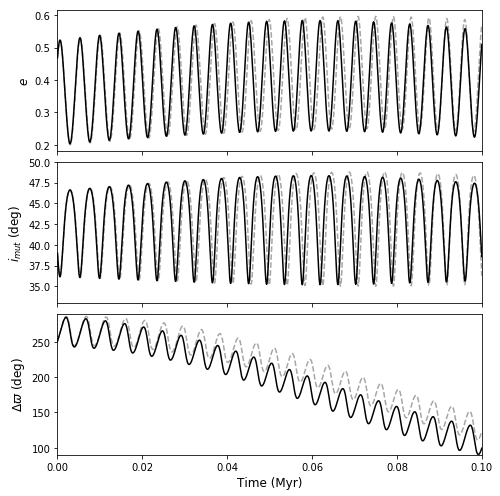

In [77]:



file = df[df['datetag']=='20191127T081335']['file'].values[0]
times,e1,imut,deltapomega = get_data(file)
color='black'
fontsize=12
times = times/(2.*np.pi)
fig, ax = plt.subplots(nrows=3,sharex=True,figsize=(7,7))
ax[0].plot(times/1e6,e1,color=color)
ax[0].set_ylabel(r'$e$', fontsize=fontsize)
ax[0].margins(x=0)
ax[1].plot(times/1e6, imut,color=color)
ax[1].set_ylabel(r'$i_{mut}$ (deg)', fontsize=fontsize)
ax[1].legend(fontsize=24)
ax[1].margins(x=0)
ax[2].plot(times/1e6, deltapomega,color=color)
ax[2].set_ylabel(r'$\Delta\varpi$ (deg)', fontsize=fontsize)
ax[2].legend(fontsize=24)
ax[2].margins(x=0)
ax[2].set_xlabel('Time (Myr)', fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

file = df[df['datetag']=='20191127T083105']['file'].values[0]
times,e1,imut,deltapomega = get_data(file)
color='gray'
ls = '--'
fontsize=12
alpha = 0.7
times = times/(2.*np.pi)
ax[0].plot(times/1e6,e1,ls=ls,color=color,alpha=alpha,zorder=0)
ax[0].set_ylabel(r'$e$', fontsize=fontsize)
ax[0].margins(x=0)
ax[1].plot(times/1e6, imut,ls=ls,color=color,alpha=alpha,zorder=0)
ax[1].set_ylabel(r'$i_{mut}$ (deg)', fontsize=fontsize)
ax[1].legend(fontsize=24)
ax[1].margins(x=0)
ax[1].set_ylim(33,50)
ax[2].plot(times/1e6, deltapomega,ls=ls,color=color,alpha=alpha,zorder=0)
ax[2].set_ylabel(r'$\Delta\varpi$ (deg)', fontsize=fontsize)
ax[2].legend(fontsize=24)
ax[2].margins(x=0)
ax[2].set_ylim(90,290)
ax[2].set_xlabel('Time (Myr)', fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0.075)
plt.savefig('KozaiGR.pdf',bbox_inches='tight')

